In [45]:
import pandas as pd
import sklearn.linear_model as lm
import numpy as np  
from sklearn.metrics import accuracy_score

In [46]:
df=pd.read_csv('framingham_train_sp24.csv')
dftest=pd.read_csv('framingham_test_sp24.csv')

In [47]:
df = pd.get_dummies(df, columns=['education'], drop_first=True)
dftest = pd.get_dummies(dftest, columns=['education'], drop_first=True)

In [48]:
trainx=df.drop('TenYearCHD',axis=1)
trainy=df['TenYearCHD']
testx=dftest.drop('TenYearCHD',axis=1)
testy=dftest['TenYearCHD']

In [59]:
model=lm.LogisticRegression(random_state=42,fit_intercept=True,max_iter=100000,verbose=True).fit(trainx,trainy)

In [61]:
model.score(testx,testy)

0.8561020036429873

In [51]:
s="$"+str(model.intercept_[0].round(2))+" "
for i in range(len(trainx.columns)):
    if(model.coef_[0][i]>0):
        s+="+"
    s+=" "+str(model.coef_[0][i].round(3))
    s+="*\\text{"+str(trainx.columns[i].replace("_",""))+"} "
s+="$"
print(s)

$-9.01 + 0.411*\text{male} + 0.071*\text{age} + 0.142*\text{currentSmoker} + 0.025*\text{cigsPerDay} + 0.278*\text{BPMeds} + 0.637*\text{prevalentStroke} + 0.226*\text{prevalentHyp}  -0.044*\text{diabetes} + 0.003*\text{totChol} + 0.009*\text{sysBP} + 0.008*\text{diaBP} + 0.006*\text{BMI}  -0.004*\text{heartRate} + 0.008*\text{glucose}  -0.121*\text{educationHigh school/GED}  -0.084*\text{educationSome college/vocational school} + 0.052*\text{educationSome high school} $


In [52]:
probs = model.predict_proba(testx)[:, 1]

threshold = 0.1105294
predictions = np.where(probs >= threshold, 1, 0)

custom_accuracy = accuracy_score(testy, predictions)
print(custom_accuracy)

0.5683060109289617


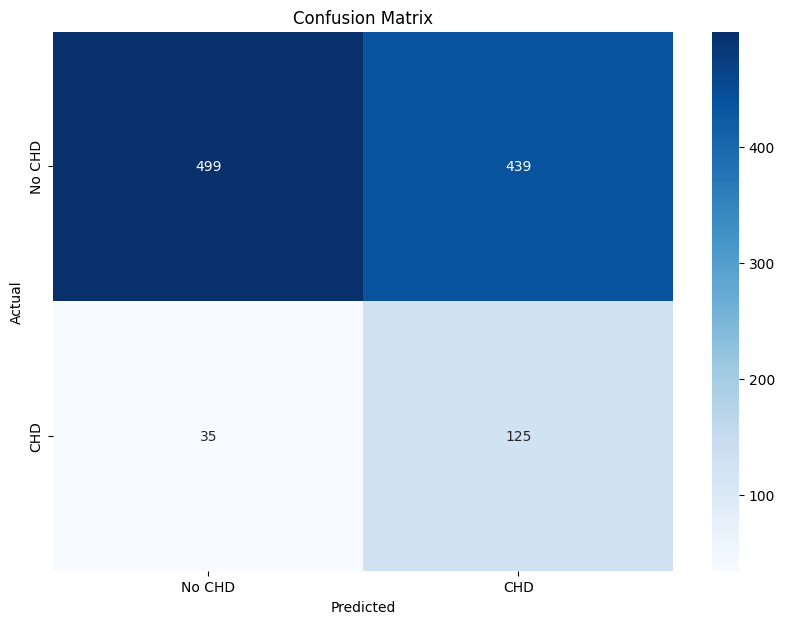

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(testy, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
cost=0
for p in probs:
    cost+=p*955000
    if(p>threshold):
        cost+=95000
        #cost-=0.9*p*955000
print(cost/len(probs))

191752.05978965497


In [55]:
cost=0
for p in probs:
    cost+=p*955000
    if(p>threshold):
        cost+=95000
        cost-=0.9*p*955000
print(cost/len(probs))

87996.14212372189


In [56]:
testx.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'education_High school/GED',
       'education_Some college/vocational school',
       'education_Some high school'],
      dtype='object')

In [57]:
model.predict_proba([[0,39,1,6,0,0,0,1,230,110,50,28,72,80,True,False,False]])

c:\Users\Milli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.97389259, 0.02610741]])

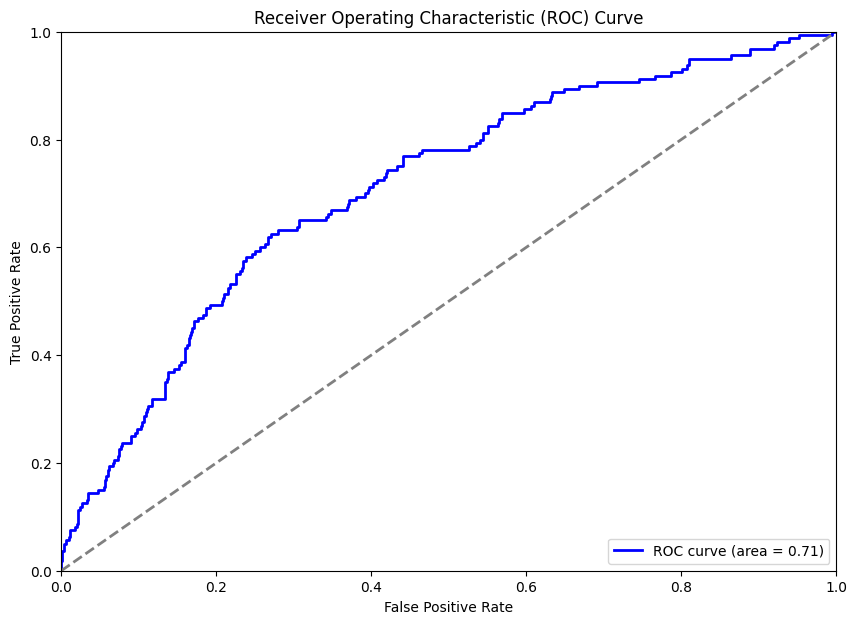

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(testy, probs)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()